In [196]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<h2> Step 1. Load data

In [197]:
df = pd.read_csv('data\\data_science_salaries.csv')
df.sample(4)

,job_title,experience_level,employment_type,work_models,work_year,employee_residence,salary,salary_currency,salary_in_usd,company_location,company_size
3860,Data Science Lead,Mid-level,Full-time,On-site,2023,United States,200000,USD,200000,United States,Medium
4795,Machine Learning Engineer,Senior-level,Full-time,On-site,2023,United Kingdom,237400,USD,237400,United Kingdom,Medium
199,Data Engineer,Senior-level,Full-time,On-site,2024,United States,128656,USD,128656,United States,Medium
1809,Data Scientist,Senior-level,Full-time,On-site,2023,United States,189100,USD,189100,United States,Medium


<h2>Step 2. Clean data</h2>

We have imported the data and made a quick overview just to get an introduction to our dataframe.
Next we should prepare the data and clean things up a little.

In [198]:
print("--- Check for missing values ---")
print(df.isnull().sum())

print("--- Check for NaN values ---")
print(df.isna().sum())

print("--- Check for data types ---")
print(df.info())

--- Check for missing values ---
job_title             0
experience_level      0
employment_type       0
work_models           0
work_year             0
employee_residence    0
salary                0
salary_currency       0
salary_in_usd         0
company_location      0
company_size          0
dtype: int64
--- Check for NaN values ---
job_title             0
experience_level      0
employment_type       0
work_models           0
work_year             0
employee_residence    0
salary                0
salary_currency       0
salary_in_usd         0
company_location      0
company_size          0
dtype: int64
--- Check for data types ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6599 entries, 0 to 6598
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   job_title           6599 non-null   object
 1   experience_level    6599 non-null   object
 2   employment_type     6599 non-null   object
 3   wor

In [199]:
df.shape

(6599, 11)

So we can see that the data has no gaps (allegedly) and that we have strings and integers to work with in terms of datatypes.
Let us look at workyear to see what sort of time-frame we have (the range)

Let us now make a seperate dataframe of numerical values only, as we have many objects currently - afterwards we will also clean the data on the nominal dataframe so it says string rather than object.

In [200]:
df.drop(['employee_residence'], axis=1, inplace=True) # This column is not useful for our analysis and proves irrelevant
df.drop(['salary', 'salary_currency'], axis=1, inplace=True) # This column is redundant as we have another column explicitly in standardized USD

In [201]:
dfNumeric = pd.get_dummies(df, columns=['job_title', 'experience_level', 'employment_type', 'work_models', 'company_location', 'company_size'], dtype=pd.Int64Dtype())
dfNumeric.head()
# Here we apply some one-hot encoding to the categorical columns to make them numeric so its easier to regress on them

,work_year,salary_in_usd,job_title_AI Architect,job_title_AI Developer,job_title_AI Engineer,job_title_AI Product Manager,job_title_AI Programmer,job_title_AI Research Engineer,job_title_AI Scientist,job_title_AWS Data Architect,...,company_location_Thailand,company_location_Turkey,company_location_Ukraine,company_location_United Arab Emirates,company_location_United Kingdom,company_location_United States,company_location_Vietnam,company_size_Large,company_size_Medium,company_size_Small
0,2024,148100,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
1,2024,98700,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
2,2024,140032,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
3,2024,100022,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
4,2024,120000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0


In [202]:
# lets convert all object types of columns into string type

for col in df:
    if df[col].dtype == 'object':
        df[col] = df[col].astype('string')
df.dtypes

job_title           string[python]
experience_level    string[python]
employment_type     string[python]
work_models         string[python]
work_year                    int64
salary_in_usd                int64
company_location    string[python]
company_size        string[python]
dtype: object

<h2> Step 3. Explore data

The exploration does the following:

* Identifies timeframe

* Shows how we can prepare columns and change their values to be more standardized

* We show the salary destribution by country

In [203]:
min_work_year = df['work_year'].min()
max_work_year = df['work_year'].max()

print(f"The range of work years is from {min_work_year} to {max_work_year}.")


The range of work years is from 2020 to 2024.


And so we can see that we have a range of 2020-2024 (4 years) and that the format is a simple integer. 
As of right now this timeframe is not really anything special as there is too little time to derive any meaningful statistics, but perhaps it is too early to rule out potential in the data.

In [204]:
df.columns

Index(['job_title', 'experience_level', 'employment_type', 'work_models',
       'work_year', 'salary_in_usd', 'company_location', 'company_size'],
      dtype='object')

We can see that the data is already fairly standardized, but let us cast them to using "x-y" instead of "x_y" to demonstrate the possibility of preparing data

In [205]:
import gc

dfStan = df.copy()


dfStan.columns = [col.upper().replace('_', '-') for col in dfStan.columns]

print(dfStan.columns)

# This is simply to demonstrate the possibility
# let us now dump this newlycreated dataframe, as having underscores and lowercase looks better.

del dfStan

gc.collect()

Index(['JOB-TITLE', 'EXPERIENCE-LEVEL', 'EMPLOYMENT-TYPE', 'WORK-MODELS',
       'WORK-YEAR', 'SALARY-IN-USD', 'COMPANY-LOCATION', 'COMPANY-SIZE'],
      dtype='object')


14332

In [206]:
df[['work_year', 'salary_in_usd']].describe() # måske fjern ?

,work_year,salary_in_usd
count,6599.000000,6599.000000
mean,2022.818457,145560.558569
std,0.674809,70946.838070
min,2020.000000,15000.000000
25%,2023.000000,95000.000000
50%,2023.000000,138666.000000
75%,2023.000000,185000.000000
max,2024.000000,750000.000000


In [207]:
# print amount of cols
corr = dfNumeric.corr()

corr["salary_in_usd"].abs().sort_values(ascending=False)

salary_in_usd                                  1.000000
company_location_United States                 0.336531
experience_level_Senior-level                  0.298585
experience_level_Entry-level                   0.263600
experience_level_Mid-level                     0.218203
                                                 ...   
job_title_Applied Machine Learning Engineer    0.001153
job_title_Finance Data Analyst                 0.001090
job_title_Business Intelligence Specialist     0.000489
job_title_Marketing Data Analyst               0.000303
job_title_Data Science Engineer                0.000062
Name: salary_in_usd, Length: 223, dtype: float64

Lets start small with a basic historam to explore the nature of our salary data

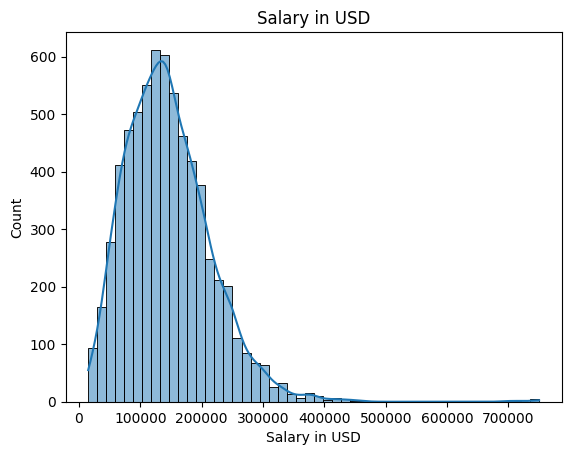

In [208]:
sns.histplot(df['salary_in_usd'], kde=True, bins=50)
plt.title('Salary in USD')
plt.ylabel('Count')
plt.xlabel('Salary in USD')
plt.show()

It seems we are dealing with a fine bell curve which means the nature of our graph is that of gaussian nature. Due to this we can use z-score technique to calculate what should be considered outliers.

In [209]:
import plotly.express as px

# Lets firstly remove the outliers in salary_in_usd as there are values quadruple that of the average salary
import z_score
dfOutliers = df.copy()
dfOutliers['salary_in_usd'] = z_score.calculateList(df['salary_in_usd'], drop=True)
# Here we use z-Score, a method Magnus made (ik alt behøves være lavet i fælleskab xd) to remove the outliers in the salary column

hist_fig = px.histogram(dfOutliers, x='salary_in_usd', color='company_location',
                        title='Salary Distribution by Country',
                        labels={'salary_in_usd': 'Salary in USD', 'company_location': 'Country'},
                        template='plotly_white')

hist_fig.show()

The majority of salaries seem to be blue (USA) which indicates what country is dominant in this industry.

Interestingly enough, we see a lot of data from this here. We can derive the following points from this observation:

- Machine learning/Data engineering is held in very high regard
- On-site workmodel seems to fetch the highest salary, and this may be exclusive to US as all of the observations are in US
- This data might be from the same company and entry id 848 might be the same person as 296 - it is hardly something we can prove, but it is worth mentioning.

Lets draw parallel to denmark and see what the highest salaries for denmark were:

In [210]:
# Lets now print all the rows the company location is denmark

df[df['company_location'] == 'Denmark']

,job_title,experience_level,employment_type,work_models,work_year,salary_in_usd,company_location,company_size
4947,Power BI Developer,Mid-level,Full-time,Remote,2023,64781,Denmark,Large
6483,Computer Vision Software Engineer,Entry-level,Part-time,Hybrid,2021,19073,Denmark,Large
6484,Marketing Data Analyst,Senior-level,Full-time,Remote,2021,88654,Denmark,Large
6485,Computer Vision Engineer,Entry-level,Part-time,Hybrid,2021,28609,Denmark,Small
6585,AI Scientist,Entry-level,Full-time,Hybrid,2020,45896,Denmark,Small


In [211]:
# Lets now print all the rows the company location is denmark

df[df['company_location'] == 'Denmark'][['job_title', 'salary_in_usd']].describe()

,salary_in_usd
count,5.000000
mean,49402.600000
std,28025.534202
min,19073.000000
25%,28609.000000
50%,45896.000000
75%,64781.000000
max,88654.000000


Its very interesting to see how much disparity there is per anum between the US and Denmark.

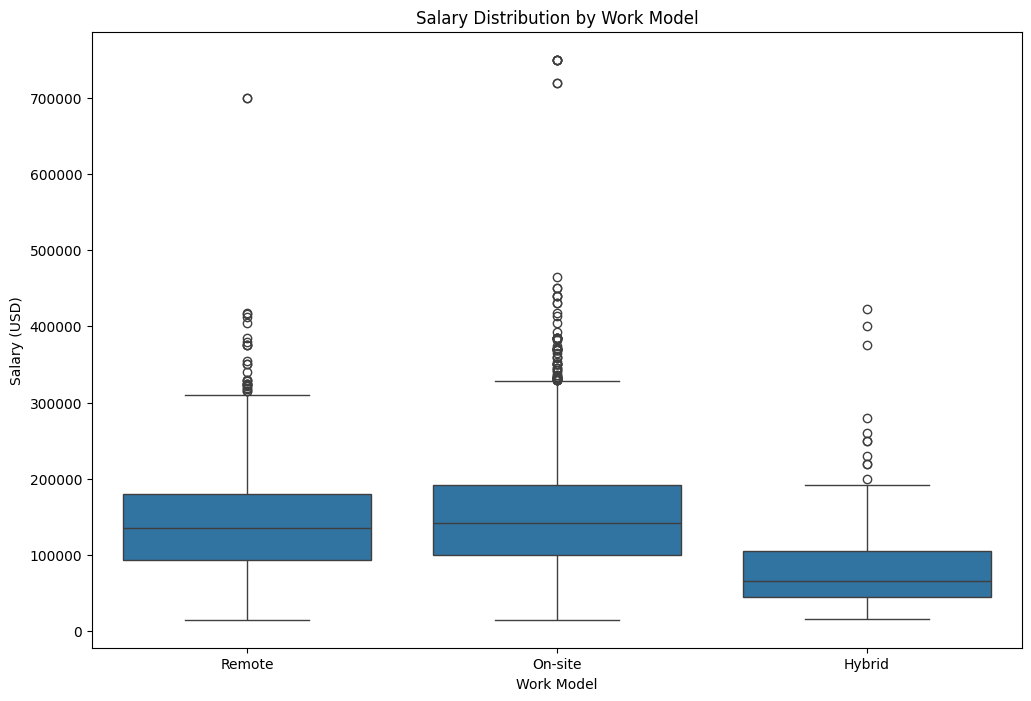

,count,mean,std,min,25%,50%,75%,max
work_models,,,,,,,,
Hybrid,225.0,83293.502222,61764.491896,15680.0,44753.0,66192.0,105066.0,423000.0
On-site,3813.0,152600.100970,72701.484514,15000.0,100000.0,142200.0,191765.0,750000.0
Remote,2561.0,140550.137837,65795.137323,15000.0,93000.0,136000.0,180000.0,700000.0


In [212]:
# We extract the relevant columns
work_salary_df = df[['work_models', 'salary_in_usd']]

# Boxplot to compare salary distribution for different work models
plt.figure(figsize=(12, 8))
sns.boxplot(x='work_models', y='salary_in_usd', data=work_salary_df)
plt.title('Salary Distribution by Work Model')
plt.xlabel('Work Model')
plt.ylabel('Salary (USD)')
plt.show()


# Summary statistics for each work model to compare solid values
summary_stats = work_salary_df.groupby('work_models')['salary_in_usd'].describe()
summary_stats


An interesting observation, it seems On-site gives the best pay while Remote comes in second. Surprisingly a hybrid variation of the job does the worst by far, having the average be almost half that of on-site. Even accounting for outliers, hybrid has far less compared to the other two, so overall it is apparent that Hybrid does the worst in terms of payout.

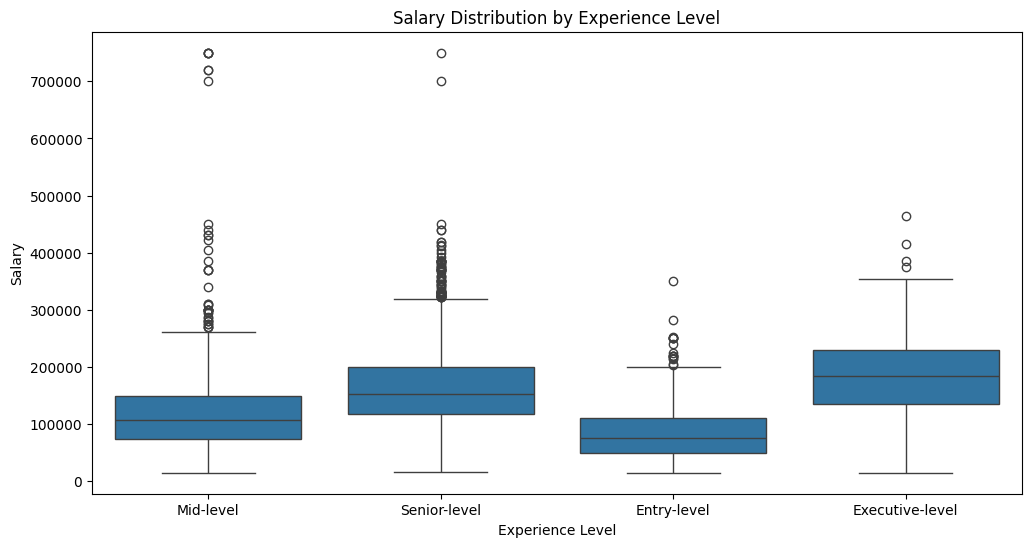

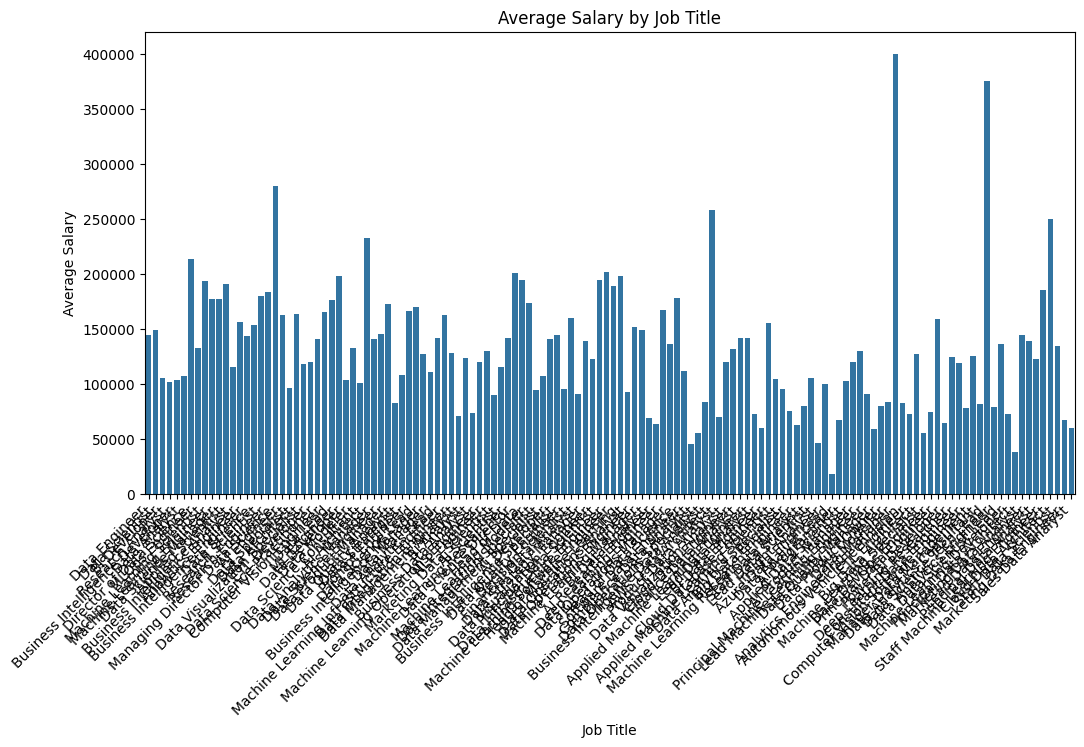

In [213]:

from matplotlib.ticker import ScalarFormatter


# Box Plot for Salary vs. Experience Level
plt.figure(figsize=(12, 6))
sns.boxplot(x='experience_level', y='salary_in_usd', data=df)
plt.title('Salary Distribution by Experience Level')
plt.xlabel('Experience Level')
plt.ylabel('Salary')
plt.show()

# Bar Plot for Average Salary by Job Title
plt.figure(figsize=(12, 6))
sns.barplot(x='job_title', y='salary_in_usd', data=df, errorbar=None)
plt.title('Average Salary by Job Title')
plt.xlabel('Job Title')
plt.ylabel('Average Salary')
plt.xticks(rotation=45, ha='right', ) 
plt.show()


The above graph is perhaps a good indicator for us, telling us that we should create clusters of our data ----- Mere text...

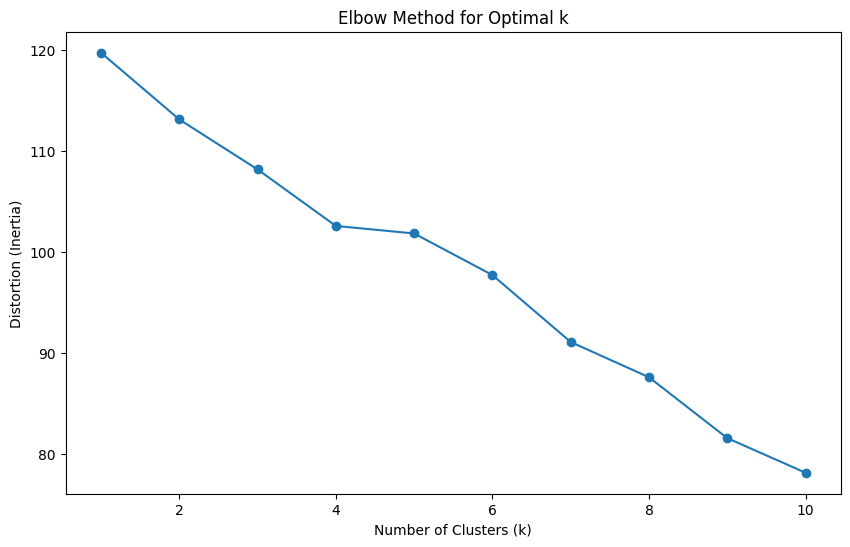

In [214]:
import plotly.express as px
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

job_titles = df['job_title'].unique()

# Create a TfidfVectorizer to convert job titles into numerical features
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(job_titles)

# Calculate distortions (inertia) for different values of k
distortions = []
K_range = range(1, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    distortions.append(kmeans.inertia_)

# We then plot the distortions to find the optimal k (Elbow method)
plt.figure(figsize=(10, 6))
plt.plot(K_range, distortions, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Distortion (Inertia)')
plt.show()


In [215]:

optimal_k = 4  # I've made this variable using the above graph
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(X)


clustered_titles = pd.DataFrame({'Job Title': job_titles, 'Cluster': kmeans.labels_})

# We apply PCA for dimensionality reduction
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X.toarray())

# we add them back to the cluster dataframe
clustered_titles['PCA1'] = X_pca[:, 0]
clustered_titles['PCA2'] = X_pca[:, 1]

# Create an interactive scatter plot with plotly
fig = px.scatter(clustered_titles, x='PCA1', y='PCA2', color='Cluster', hover_data=['Job Title'], title='Job Title Clusters',
                 labels={'Cluster': 'Cluster'},
                 template='plotly_white')

# Show the interactive plot
fig.show()

In [216]:
import geopandas as gpd
import folium
from folium import Choropleth, CircleMarker

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

merged_df = pd.merge(world, df, left_on='name', right_on='company_location', how='left')


choropleth_map = folium.Map(location=[0,0], zoom_start=2)

Choropleth(
    geo_data=world,
    name='choropleth',
    data=merged_df,
    columns=['name', 'salary_in_usd'],
    key_on='feature.properties.name',
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Average Salary',
).add_to(choropleth_map)


# a button to toggle the new heatmap layer
folium.LayerControl().add_to(choropleth_map)

choropleth_map

C:\Users\pean\AppData\Local\Temp\ipykernel_24876\1054362436.py:5: FutureWarning:

The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.



Many places that should be highlighted like the US isnt showing on this map, so lets figure out why

In [217]:
# Using this to display the actual world names that our dataframe should match

print(world['name'].unique()[:10])

# I just limited the output to 10 to examplify what was done, printing the full thing would give a wall of text.
# as you can see below though, the US is written as "United States of America"

['Fiji' 'Tanzania' 'W. Sahara' 'Canada' 'United States of America'
 'Kazakhstan' 'Uzbekistan' 'Papua New Guinea' 'Indonesia' 'Argentina']


It seems the US is defined as "United States of America"rather than just United States as shown on the physical map. And i also will changed the salary to "salary_in_usd" as it only makes sense to compare money in a standardized way. 

In [218]:
import mismatchFinder as mf

worldNames = world['name'].unique()

threshhold = 81

df = mf.find_and_correct_mismatches(worldNames, df, threshhold)

Corrected: United States -> United States of America
Corrected: Central African Republic -> Central African Rep.
Corrected: Bosnia and Herzegovina -> Bosnia and Herz.


In [219]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Merge our DataFrame with the Natural Earth dataset 
merged_df = pd.merge(world, df, left_on='name', right_on='company_location', how='left')


choropleth_map = folium.Map(location=[0,0], zoom_start=2)

# we add a new layer to the map
Choropleth(
    geo_data=world,
    name='choropleth',
    data=merged_df,
    columns=['name', 'salary_in_usd'],
    key_on='feature.properties.name',
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Average Salary in USD',
).add_to(choropleth_map)

# a button to toggle the new heatmap layer
folium.LayerControl().add_to(choropleth_map)

choropleth_map

C:\Users\pean\AppData\Local\Temp\ipykernel_24876\2720364218.py:1: FutureWarning:

The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.



In [220]:
# TODO

# 1. Discuss some more models to use
# 2. Discuss the training an AI
# 3. What more plots should we use and whats interesting to look at (Tal om strukturen af opgaven, ved ik om det er for meget den måde jeg har gjort det hidtil)
# 4. regressions, clustering (needs a lookat), classification etc.

In [221]:
df["job_title"].unique()

<StringArray>
[                  'Data Engineer',                  'Data Scientist',
                    'BI Developer',                'Research Analyst',
 'Business Intelligence Developer',                    'Data Analyst',
        'Director of Data Science',                  'MLOps Engineer',
      'Machine Learning Scientist',       'Machine Learning Engineer',
 ...
      'Machine Learning Developer',        'Principal Data Architect',
          'Marketing Data Analyst',              'Lead Data Engineer',
          'Principal Data Analyst', 'Staff Machine Learning Engineer',
            'Cloud Data Architect',            'Staff Data Scientist',
         'Marketing Data Engineer',              'Sales Data Analyst']
Length: 132, dtype: string

In [222]:
from sklearn.linear_model import LinearRegression


filtered_df = dfNumeric[dfNumeric["job_title_Data Scientist"] > 0.5]

X = filtered_df["work_year"].values.reshape(-1, 1)
y = filtered_df['salary_in_usd'].values

model = LinearRegression().fit(X, y)

r_sq = model.score(X, y)
print('coefficient of determination:', r_sq)

print('intercept:', model.intercept_)
print('slope:', model.coef_)

coefficient of determination: 0.05520139881916686
intercept: -43485301.47157489
slope: [21571.56902513]


In [223]:
test_size = 0.2
random_state = 42

In [224]:
trainDf = df[["work_year", "salary_in_usd"]]

X = trainDf.drop('salary_in_usd', axis=1)
y = trainDf['salary_in_usd']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

In [225]:
import modelchecker as mc

print("LinearRegression")
LRModelChecker = mc.ModelChecker(LinearRegression(), X_train, y_train, X_test, y_test)
LRModelChecker.run()
LRModelChecker.show_accuracy()

LinearRegression
R2 accuracy score: 0.021936669841023493
Mean squared error: 5748078919.189611
Root mean squared error: 75816.08615056313


(0.021936669841023493, 5748078919.189611, 75816.08615056313)

In [226]:
#df.head()

X_job_exp = df[['salary_in_usd', 'work_year']]
kmeans_job_exp = KMeans(n_clusters=3, random_state=0).fit(X_job_exp)
kmeans_job_exp.labels_

array([1, 0, 1, ..., 0, 0, 0])

In [227]:
def fit_linear_regression(df, job_title, test_size=0.2, random_state=42):
    experience_levels = df['experience_level'].unique()
    employment_types = df['employment_type'].unique()
    work_models = df['work_models'].unique()
    company_sizes = df['company_size'].unique()

    for exp_level in experience_levels:
        for emp_type in employment_types:
            for work_model in work_models:
                for company_size in company_sizes:
                    filtered_df = df[(df['job_title'] == job_title) & 
                                     (df['experience_level'] == exp_level) & 
                                     (df['employment_type'] == emp_type) & 
                                     (df['work_models'] == work_model) & 
                                     (df['company_size'] == company_size)]

                    if filtered_df.shape[0] < 2:  # Check if there are enough data points
                        print(f"\nInsufficient data for {job_title}, {exp_level}, {emp_type}, {work_model}, {company_size}.")
                        continue

                    # Prepare data for linear regression
                    train_df = filtered_df[['work_year', 'salary_in_usd']]
                    X = train_df.drop('salary_in_usd', axis=1)
                    y = train_df['salary_in_usd']

                    # Split data into train and test sets
                    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

                    # Fit linear regression model
                    model = LinearRegression()
                    model.fit(X_train, y_train)

                    # Model evaluation
                    print(f"\nLinear Regression for {job_title}:")
                    print("Experience Level:", exp_level)
                    print("Employment Type:", emp_type)
                    print("Work Model:", work_model)
                    print("Company Size:", company_size)
                    print("Equation of the line: y = {:.2f}x + {:.2f}".format(model.coef_[0], model.intercept_))
                    model_checker = mc.ModelChecker(model, X_train, y_train, X_test, y_test)
                    model_checker.run()
                    model_checker.show_accuracy()

                    # Plotting
                    plt.scatter(X_train, y_train, color='blue')
                    plt.plot(X_train, model.predict(X_train), color='red')
                    plt.title(f'Linear Regression for {job_title}')
                    plt.xlabel('Year')
                    plt.ylabel('Salary (USD)')
                    plt.text(0.5, 0.9, f'y = {model.coef_[0]:.2f}x + {model.intercept_:.2f}', horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)
                    plt.show()



Linear Regression for Data Scientist:
Experience Level: Mid-level
Employment Type: Full-time
Work Model: Remote
Company Size: Medium
Equation of the line: y = 8717.44x + -17513352.54
R2 accuracy score: 0.13083900188603215
Mean squared error: 2281912846.749246
Root mean squared error: 47769.37142928768


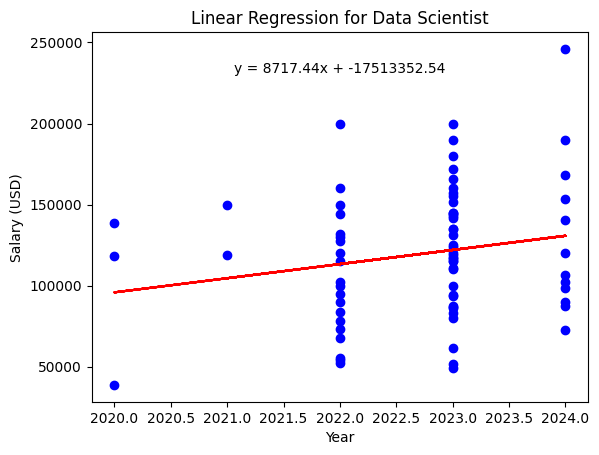


Linear Regression for Data Scientist:
Experience Level: Mid-level
Employment Type: Full-time
Work Model: Remote
Company Size: Large
Equation of the line: y = -4792.82x + 9769003.17
R2 accuracy score: 0.014812064121510593
Mean squared error: 2851351503.3024454
Root mean squared error: 53398.04774804455


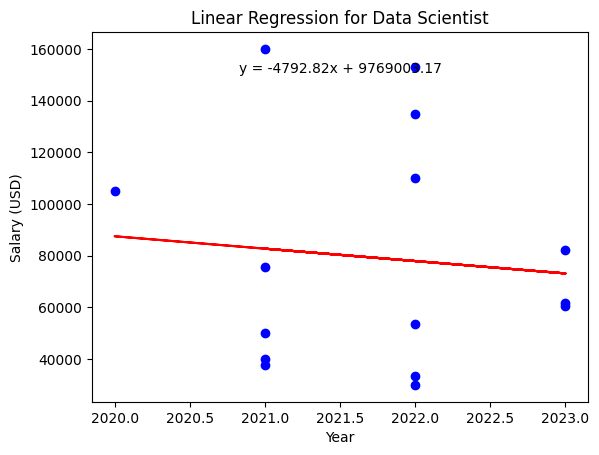


Linear Regression for Data Scientist:
Experience Level: Mid-level
Employment Type: Full-time
Work Model: Remote
Company Size: Small
Equation of the line: y = 9284.25x + -18708550.25
R2 accuracy score: -2.685477032233553
Mean squared error: 758035248.4583334
Root mean squared error: 27532.439929260418


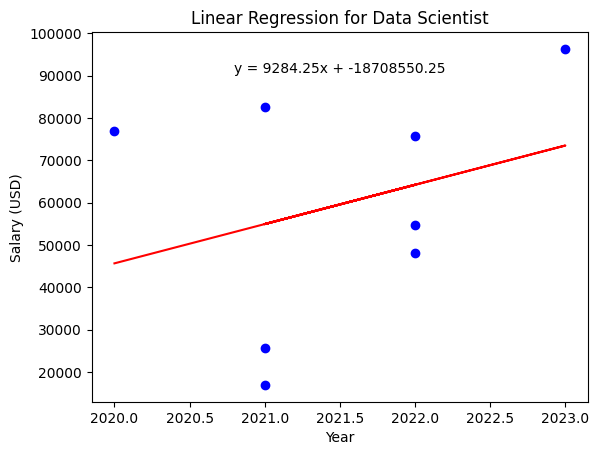


Linear Regression for Data Scientist:
Experience Level: Mid-level
Employment Type: Full-time
Work Model: On-site
Company Size: Medium
Equation of the line: y = 17510.86x + -35297066.06
R2 accuracy score: -0.04405158641124873
Mean squared error: 3704040890.5068474
Root mean squared error: 60860.83215424225


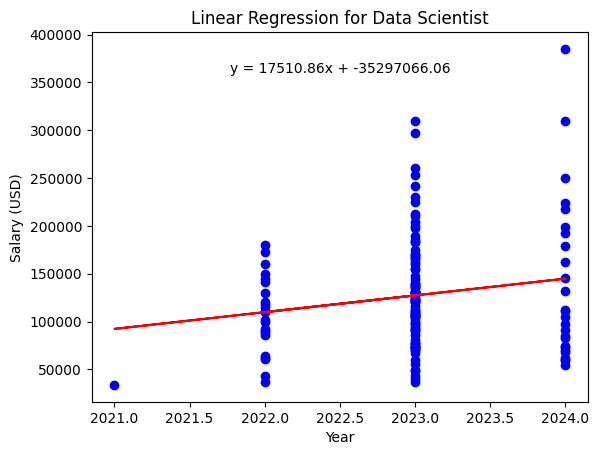


Linear Regression for Data Scientist:
Experience Level: Mid-level
Employment Type: Full-time
Work Model: On-site
Company Size: Large
Equation of the line: y = 18180.00x + -36666948.00
R2 accuracy score: 0.7717061085197442
Mean squared error: 288672612.5
Root mean squared error: 16990.368227322208


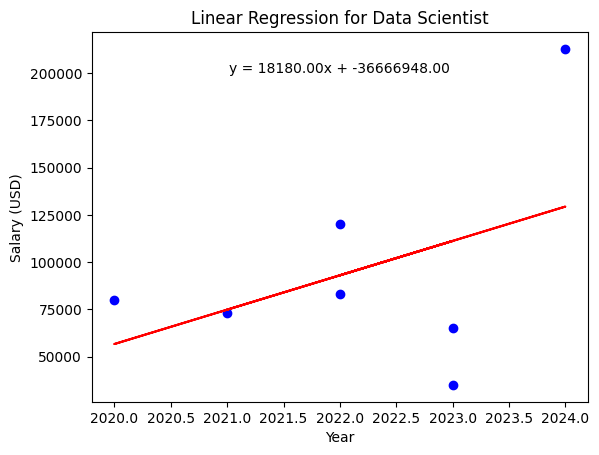


Insufficient data for Data Scientist, Mid-level, Full-time, On-site, Small.

Linear Regression for Data Scientist:
Experience Level: Mid-level
Employment Type: Full-time
Work Model: Hybrid
Company Size: Medium
Equation of the line: y = 1657.00x + -3284415.00
R2 accuracy score: nan
Mean squared error: 1684199521.0
Root mean squared error: 41039.0


C:\Users\pean\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_regression.py:1187: UndefinedMetricWarning:

R^2 score is not well-defined with less than two samples.



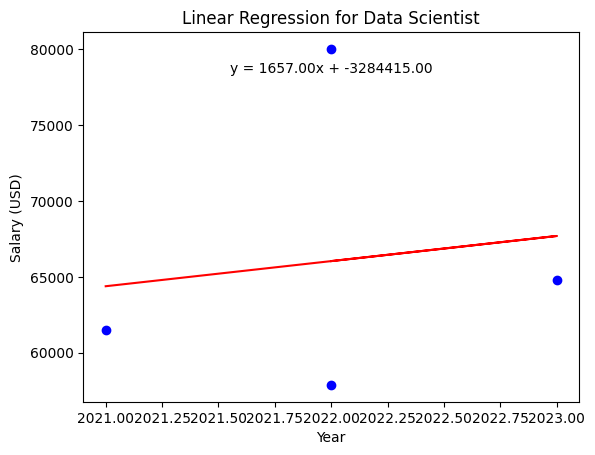


Linear Regression for Data Scientist:
Experience Level: Mid-level
Employment Type: Full-time
Work Model: Hybrid
Company Size: Large
Equation of the line: y = -14766.62x + 29942591.50
R2 accuracy score: -0.8076267433810365
Mean squared error: 1317960456.9322917
Root mean squared error: 36303.72511096198


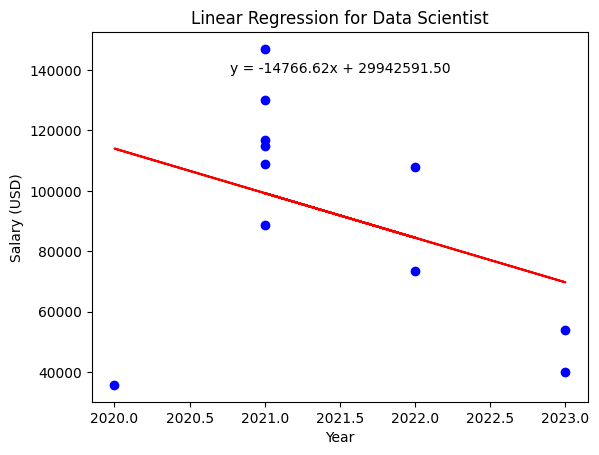

C:\Users\pean\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_regression.py:1187: UndefinedMetricWarning:

R^2 score is not well-defined with less than two samples.




Linear Regression for Data Scientist:
Experience Level: Mid-level
Employment Type: Full-time
Work Model: Hybrid
Company Size: Small
Equation of the line: y = 0.00x + 52461.50
R2 accuracy score: nan
Mean squared error: 2946372.25
Root mean squared error: 1716.5


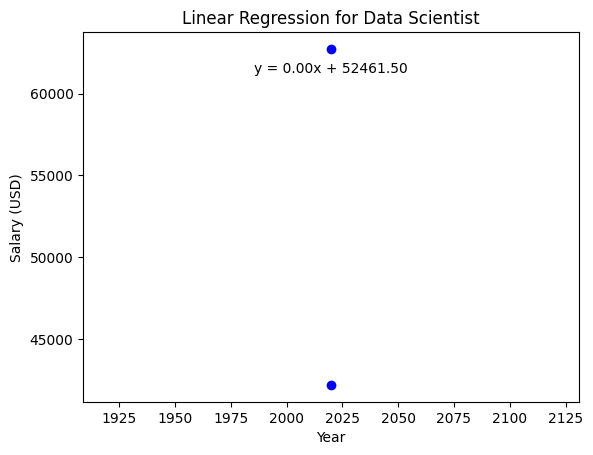


Insufficient data for Data Scientist, Mid-level, Part-time, Remote, Medium.

Insufficient data for Data Scientist, Mid-level, Part-time, Remote, Large.

Insufficient data for Data Scientist, Mid-level, Part-time, Remote, Small.

Insufficient data for Data Scientist, Mid-level, Part-time, On-site, Medium.

Insufficient data for Data Scientist, Mid-level, Part-time, On-site, Large.

Insufficient data for Data Scientist, Mid-level, Part-time, On-site, Small.

Insufficient data for Data Scientist, Mid-level, Part-time, Hybrid, Medium.

Insufficient data for Data Scientist, Mid-level, Part-time, Hybrid, Large.

Insufficient data for Data Scientist, Mid-level, Part-time, Hybrid, Small.

Insufficient data for Data Scientist, Mid-level, Contract, Remote, Medium.

Insufficient data for Data Scientist, Mid-level, Contract, Remote, Large.

Insufficient data for Data Scientist, Mid-level, Contract, Remote, Small.

Insufficient data for Data Scientist, Mid-level, Contract, On-site, Medium.

Insuff

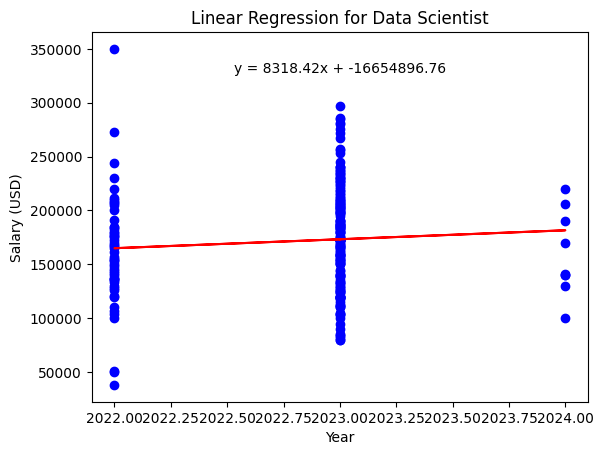


Linear Regression for Data Scientist:
Experience Level: Senior-level
Employment Type: Full-time
Work Model: Remote
Company Size: Large
Equation of the line: y = -61893.94x + 125292250.94
R2 accuracy score: -3.9014539201417993
Mean squared error: 14523953686.20968
Root mean squared error: 120515.36701271619


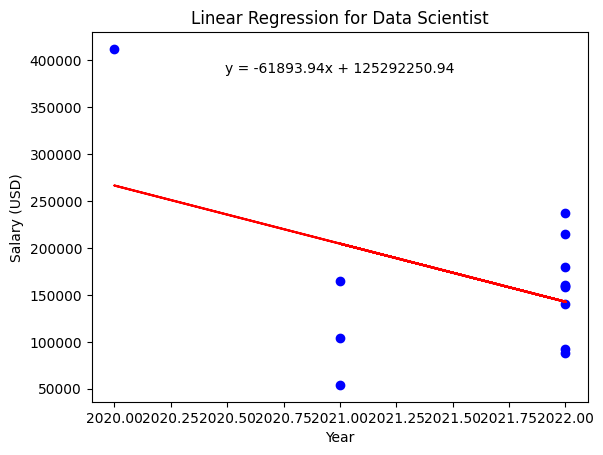


Linear Regression for Data Scientist:
Experience Level: Senior-level
Employment Type: Full-time
Work Model: Remote
Company Size: Small
Equation of the line: y = -32738.00x + 66251236.00
R2 accuracy score: nan
Mean squared error: 4225000000.0
Root mean squared error: 65000.0


C:\Users\pean\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_regression.py:1187: UndefinedMetricWarning:

R^2 score is not well-defined with less than two samples.



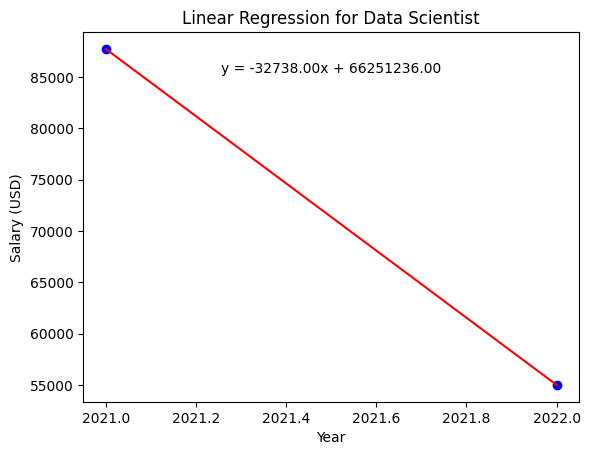


Linear Regression for Data Scientist:
Experience Level: Senior-level
Employment Type: Full-time
Work Model: On-site
Company Size: Medium
Equation of the line: y = 10870.95x + -21817422.67
R2 accuracy score: -0.0107601841329652
Mean squared error: 7501995181.249349
Root mean squared error: 86614.05879676434


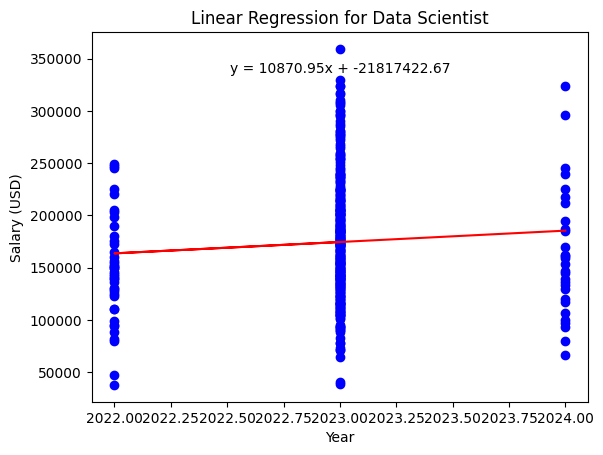


Linear Regression for Data Scientist:
Experience Level: Senior-level
Employment Type: Full-time
Work Model: On-site
Company Size: Large
Equation of the line: y = 2433.33x + -4765061.11
R2 accuracy score: -0.36249826360084714
Mean squared error: 3001569417.5308356
Root mean squared error: 54786.58063368105


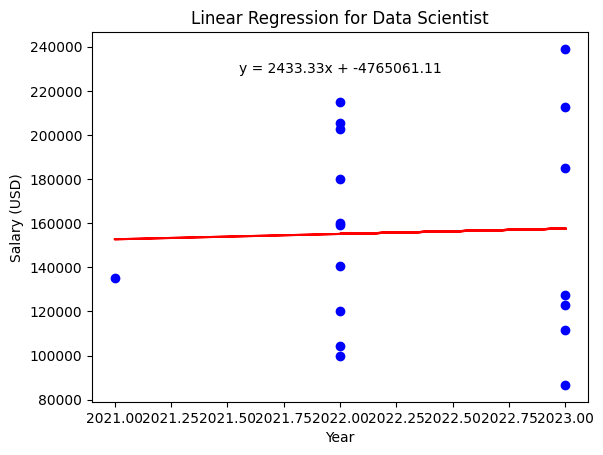


Linear Regression for Data Scientist:
Experience Level: Senior-level
Employment Type: Full-time
Work Model: On-site
Company Size: Small
Equation of the line: y = 16921.00x + -34089183.00
R2 accuracy score: nan
Mean squared error: 9604000000.0
Root mean squared error: 98000.0


C:\Users\pean\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_regression.py:1187: UndefinedMetricWarning:

R^2 score is not well-defined with less than two samples.



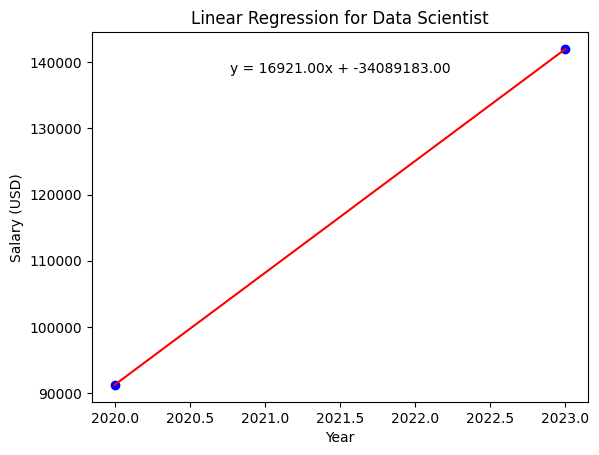


Linear Regression for Data Scientist:
Experience Level: Senior-level
Employment Type: Full-time
Work Model: Hybrid
Company Size: Medium
Equation of the line: y = 0.00x + 134960.00
R2 accuracy score: nan
Mean squared error: 3280540176.0
Root mean squared error: 57276.0


C:\Users\pean\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_regression.py:1187: UndefinedMetricWarning:

R^2 score is not well-defined with less than two samples.



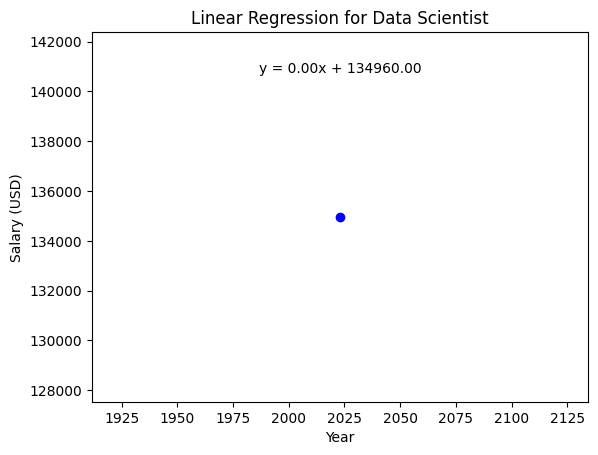


Linear Regression for Data Scientist:
Experience Level: Senior-level
Employment Type: Full-time
Work Model: Hybrid
Company Size: Large
Equation of the line: y = -7596.00x + 15420650.00
R2 accuracy score: nan
Mean squared error: 95238081.0
Root mean squared error: 9759.0


C:\Users\pean\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_regression.py:1187: UndefinedMetricWarning:

R^2 score is not well-defined with less than two samples.



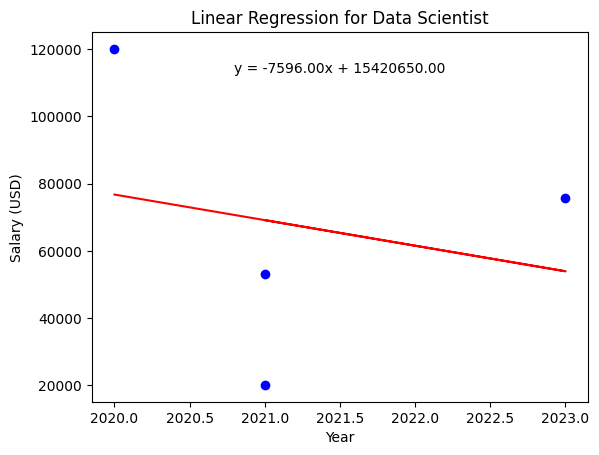


Insufficient data for Data Scientist, Senior-level, Full-time, Hybrid, Small.

Insufficient data for Data Scientist, Senior-level, Part-time, Remote, Medium.

Insufficient data for Data Scientist, Senior-level, Part-time, Remote, Large.

Insufficient data for Data Scientist, Senior-level, Part-time, Remote, Small.

Insufficient data for Data Scientist, Senior-level, Part-time, On-site, Medium.

Insufficient data for Data Scientist, Senior-level, Part-time, On-site, Large.

Insufficient data for Data Scientist, Senior-level, Part-time, On-site, Small.

Insufficient data for Data Scientist, Senior-level, Part-time, Hybrid, Medium.

Insufficient data for Data Scientist, Senior-level, Part-time, Hybrid, Large.

Insufficient data for Data Scientist, Senior-level, Part-time, Hybrid, Small.

Insufficient data for Data Scientist, Senior-level, Contract, Remote, Medium.

Insufficient data for Data Scientist, Senior-level, Contract, Remote, Large.

Insufficient data for Data Scientist, Senior-l

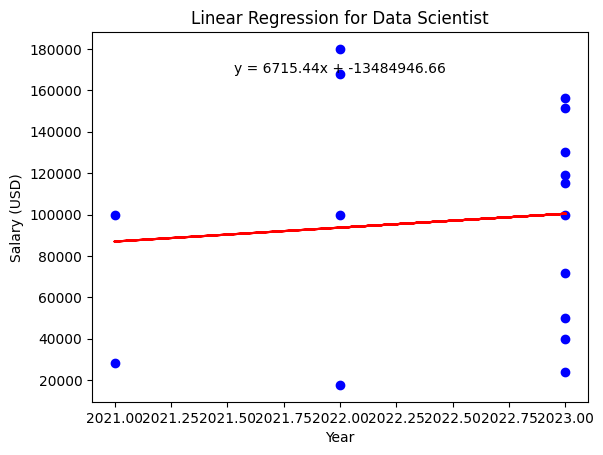


Linear Regression for Data Scientist:
Experience Level: Entry-level
Employment Type: Full-time
Work Model: Remote
Company Size: Large
Equation of the line: y = -39047.08x + 79022651.25
R2 accuracy score: 0.11466219459429261
Mean squared error: 272391121.4199958
Root mean squared error: 16504.275852638788


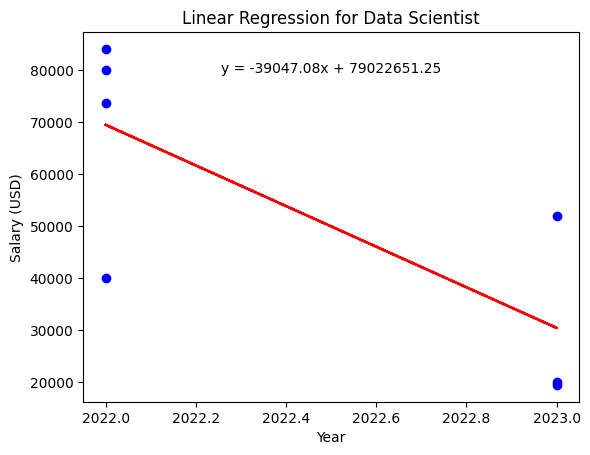


Linear Regression for Data Scientist:
Experience Level: Entry-level
Employment Type: Full-time
Work Model: Remote
Company Size: Small
Equation of the line: y = 0.00x + 90000.00
R2 accuracy score: nan
Mean squared error: 225000000.0
Root mean squared error: 15000.0


C:\Users\pean\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_regression.py:1187: UndefinedMetricWarning:

R^2 score is not well-defined with less than two samples.



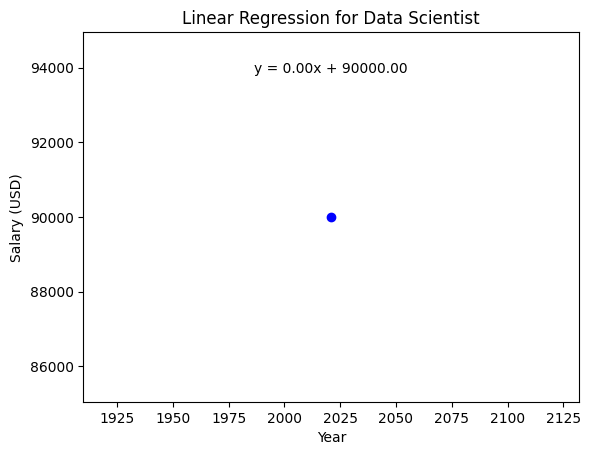


Linear Regression for Data Scientist:
Experience Level: Entry-level
Employment Type: Full-time
Work Model: On-site
Company Size: Medium
Equation of the line: y = 17920.86x + -36152262.11
R2 accuracy score: -0.06558421314162244
Mean squared error: 2334853835.1880803
Root mean squared error: 48320.32528023875


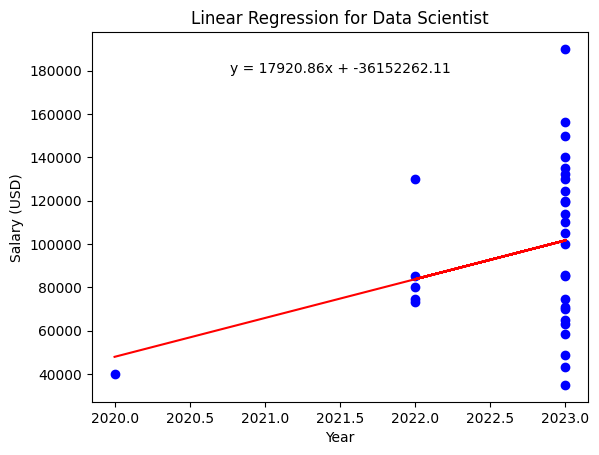


Linear Regression for Data Scientist:
Experience Level: Entry-level
Employment Type: Full-time
Work Model: On-site
Company Size: Large
Equation of the line: y = -49610.00x + 100393420.00
R2 accuracy score: nan
Mean squared error: 4571112100.0
Root mean squared error: 67610.0


C:\Users\pean\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_regression.py:1187: UndefinedMetricWarning:

R^2 score is not well-defined with less than two samples.



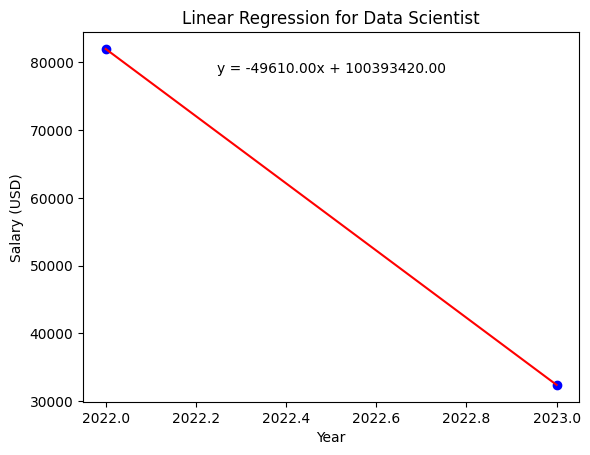


Linear Regression for Data Scientist:
Experience Level: Entry-level
Employment Type: Full-time
Work Model: On-site
Company Size: Small
Equation of the line: y = 0.00x + 50294.50
R2 accuracy score: nan
Mean squared error: 2470636730.25
Root mean squared error: 49705.5


C:\Users\pean\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_regression.py:1187: UndefinedMetricWarning:

R^2 score is not well-defined with less than two samples.



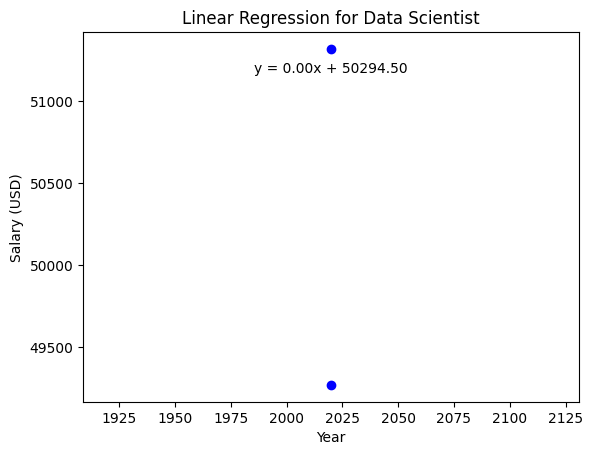


Linear Regression for Data Scientist:
Experience Level: Entry-level
Employment Type: Full-time
Work Model: Hybrid
Company Size: Medium
Equation of the line: y = 2375.00x + -4750229.00
R2 accuracy score: nan
Mean squared error: 420291001.0
Root mean squared error: 20501.0


C:\Users\pean\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_regression.py:1187: UndefinedMetricWarning:

R^2 score is not well-defined with less than two samples.



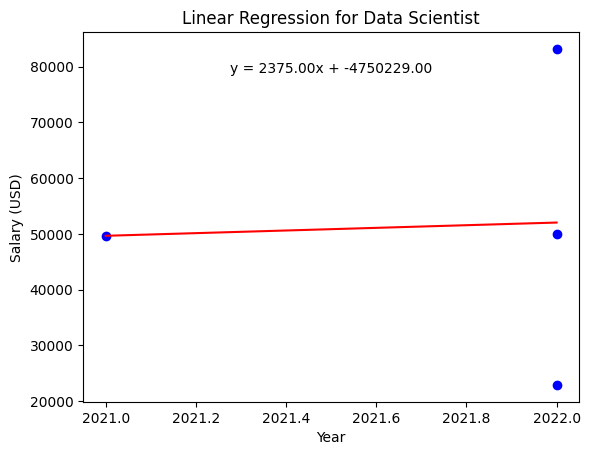


Linear Regression for Data Scientist:
Experience Level: Entry-level
Employment Type: Full-time
Work Model: Hybrid
Company Size: Large
Equation of the line: y = 17155.00x + -34641646.83
R2 accuracy score: -1.1207577915259583
Mean squared error: 2215169180.027999
Root mean squared error: 47065.58381692507


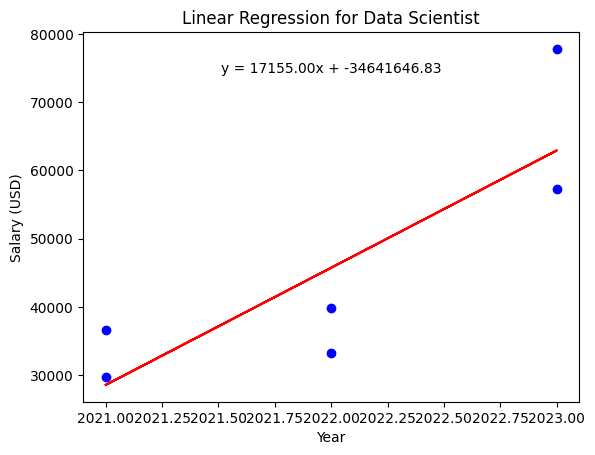


Linear Regression for Data Scientist:
Experience Level: Entry-level
Employment Type: Full-time
Work Model: Hybrid
Company Size: Small
Equation of the line: y = -5359.00x + 10887906.00
R2 accuracy score: nan
Mean squared error: 4013349201.0
Root mean squared error: 63351.0


C:\Users\pean\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_regression.py:1187: UndefinedMetricWarning:

R^2 score is not well-defined with less than two samples.



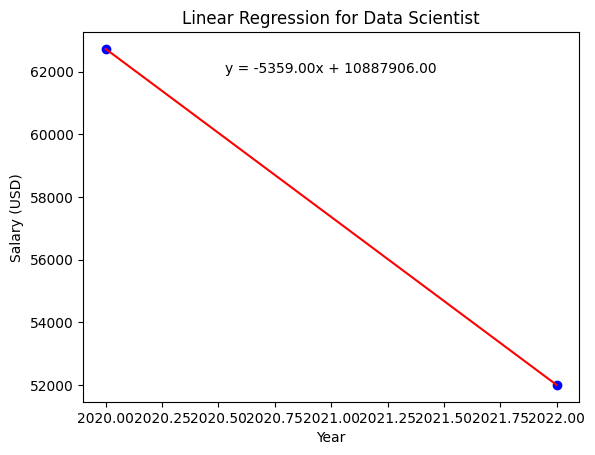


Insufficient data for Data Scientist, Entry-level, Part-time, Remote, Medium.

Insufficient data for Data Scientist, Entry-level, Part-time, Remote, Large.

Insufficient data for Data Scientist, Entry-level, Part-time, Remote, Small.

Linear Regression for Data Scientist:
Experience Level: Entry-level
Employment Type: Part-time
Work Model: On-site
Company Size: Medium
Equation of the line: y = 0.00x + 133000.00
R2 accuracy score: nan
Mean squared error: 5580090000.0
Root mean squared error: 74700.0


C:\Users\pean\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_regression.py:1187: UndefinedMetricWarning:

R^2 score is not well-defined with less than two samples.



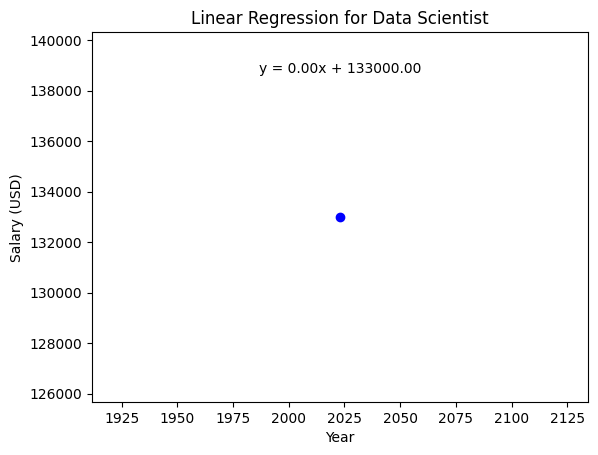


Insufficient data for Data Scientist, Entry-level, Part-time, On-site, Large.

Insufficient data for Data Scientist, Entry-level, Part-time, On-site, Small.

Insufficient data for Data Scientist, Entry-level, Part-time, Hybrid, Medium.

Insufficient data for Data Scientist, Entry-level, Part-time, Hybrid, Large.

Insufficient data for Data Scientist, Entry-level, Part-time, Hybrid, Small.

Insufficient data for Data Scientist, Entry-level, Contract, Remote, Medium.

Insufficient data for Data Scientist, Entry-level, Contract, Remote, Large.

Insufficient data for Data Scientist, Entry-level, Contract, Remote, Small.

Insufficient data for Data Scientist, Entry-level, Contract, On-site, Medium.

Insufficient data for Data Scientist, Entry-level, Contract, On-site, Large.

Insufficient data for Data Scientist, Entry-level, Contract, On-site, Small.

Insufficient data for Data Scientist, Entry-level, Contract, Hybrid, Medium.

Insufficient data for Data Scientist, Entry-level, Contract, 

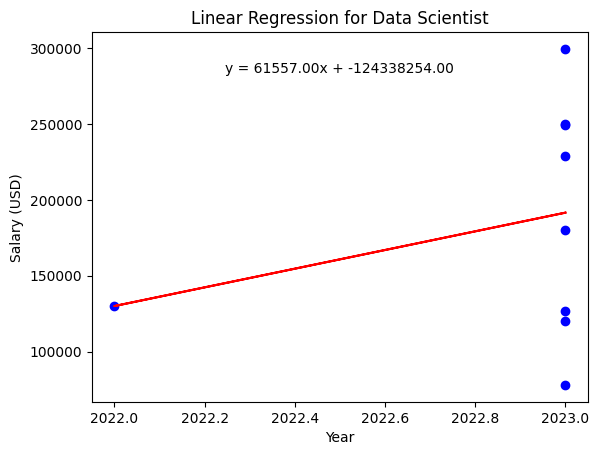


Insufficient data for Data Scientist, Executive-level, Full-time, Remote, Large.

Insufficient data for Data Scientist, Executive-level, Full-time, Remote, Small.

Linear Regression for Data Scientist:
Experience Level: Executive-level
Employment Type: Full-time
Work Model: On-site
Company Size: Medium
Equation of the line: y = 26992.86x + -54387442.86
R2 accuracy score: -4.458919489831208
Mean squared error: 9154075739.796679
Root mean squared error: 95676.93420985373


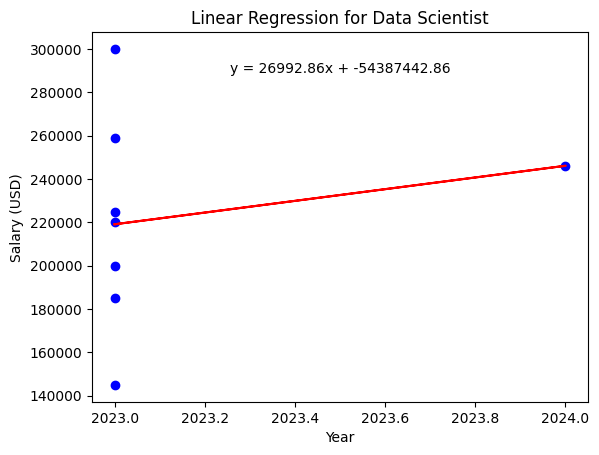


Insufficient data for Data Scientist, Executive-level, Full-time, On-site, Large.

Insufficient data for Data Scientist, Executive-level, Full-time, On-site, Small.

Insufficient data for Data Scientist, Executive-level, Full-time, Hybrid, Medium.

Insufficient data for Data Scientist, Executive-level, Full-time, Hybrid, Large.

Insufficient data for Data Scientist, Executive-level, Full-time, Hybrid, Small.

Insufficient data for Data Scientist, Executive-level, Part-time, Remote, Medium.

Insufficient data for Data Scientist, Executive-level, Part-time, Remote, Large.

Insufficient data for Data Scientist, Executive-level, Part-time, Remote, Small.

Insufficient data for Data Scientist, Executive-level, Part-time, On-site, Medium.

Insufficient data for Data Scientist, Executive-level, Part-time, On-site, Large.

Insufficient data for Data Scientist, Executive-level, Part-time, On-site, Small.

Insufficient data for Data Scientist, Executive-level, Part-time, Hybrid, Medium.

Insuff

In [228]:
fit_linear_regression(df, 'Data Scientist')